In [64]:
print('hello world')

hello world


In [65]:
# Always import these packages for work
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Reading a csv file in using filepath name
df = pd.read_csv("/Users/eveschoenrock/Desktop/Code/2021-06-15-survey.csv")
df.head()

,Timestamp,Operating System,CPU Cycle Rate (in GHz),CPU Number of Cores,RAM (in GB),Hard Drive Size (in GB),GPU (short description)
0,6/12/2021 23:05:22,Windows 10,1.8,4,8,256,intel uhd 620
1,6/13/2021 20:36:02,Windows 10,2.8,4,16,460,Intel(R) Iris(R) Xe Graphics
2,6/13/2021 22:31:11,MacOS,3.1,2,8,512,Intel Iris Plus Graphics 650
3,6/14/2021 13:31:30,Windows 10,3.5,4,16,1000,NVIDIA GeForce GTX 1070 Ti
4,6/14/2021 14:13:55,MacOS,1.6,2,8,256,Intel HD Graphics 6000 1536 MB


In [67]:
# Change column names to make dataframe use easier throughout
df.columns = ['timestamp', 'os', 'cpu', 'cpu_core', 'ram', 'hard_drive', 'gpu']
df.head()

,timestamp,os,cpu,cpu_core,ram,hard_drive,gpu
0,6/12/2021 23:05:22,Windows 10,1.8,4,8,256,intel uhd 620
1,6/13/2021 20:36:02,Windows 10,2.8,4,16,460,Intel(R) Iris(R) Xe Graphics
2,6/13/2021 22:31:11,MacOS,3.1,2,8,512,Intel Iris Plus Graphics 650
3,6/14/2021 13:31:30,Windows 10,3.5,4,16,1000,NVIDIA GeForce GTX 1070 Ti
4,6/14/2021 14:13:55,MacOS,1.6,2,8,256,Intel HD Graphics 6000 1536 MB


In [68]:
# Check data types - see that timestamp was not imported as a timestamp
df.dtypes

timestamp      object
os             object
cpu           float64
cpu_core        int64
ram             int64
hard_drive      int64
gpu            object
dtype: object

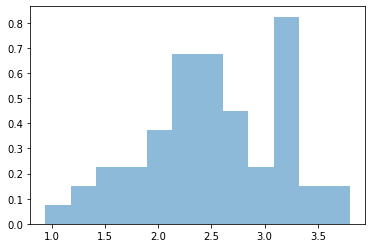

In [69]:
# Begin plotting histograms
plt.hist(df.cpu, 12, density=True, histtype='bar', alpha=.5)
plt.show()

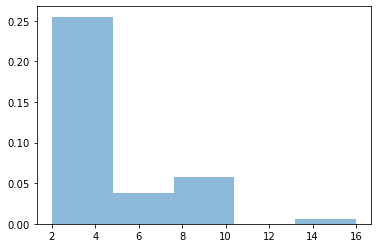

In [70]:
plt.hist(df.cpu_core, 5, density=True, histtype='bar', alpha=.5)
plt.show()

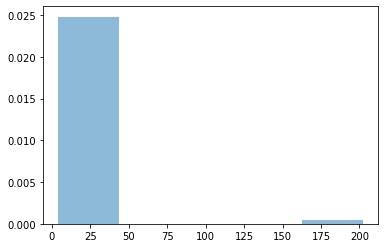

In [71]:
plt.hist(df.ram, 5, density=True, histtype='bar', alpha=.5)
plt.show()

In [72]:
df.describe()['ram']
df = df[df.ram < 100]

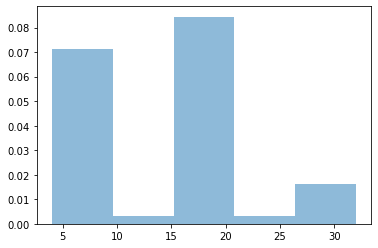

In [74]:
plt.hist(df.ram, 5, density=True, histtype='bar', alpha=.5)
plt.show()

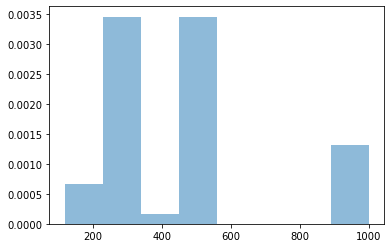

In [75]:
plt.hist(df.hard_drive, 8, density=True, histtype='bar', alpha=.5)
plt.show()

In [76]:
# Converting to timestamp in datetime format (best for seeing trends)
from datetime import datetime
timestamp_col = pd.to_datetime(df['timestamp'])

timestamp_col.head()

df['timestamp2'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,os,cpu,cpu_core,ram,hard_drive,gpu,timestamp2
0,6/12/2021 23:05:22,Windows 10,1.8,4,8,256,intel uhd 620,2021-06-12 23:05:22
1,6/13/2021 20:36:02,Windows 10,2.8,4,16,460,Intel(R) Iris(R) Xe Graphics,2021-06-13 20:36:02
2,6/13/2021 22:31:11,MacOS,3.1,2,8,512,Intel Iris Plus Graphics 650,2021-06-13 22:31:11
3,6/14/2021 13:31:30,Windows 10,3.5,4,16,1000,NVIDIA GeForce GTX 1070 Ti,2021-06-14 13:31:30
4,6/14/2021 14:13:55,MacOS,1.6,2,8,256,Intel HD Graphics 6000 1536 MB,2021-06-14 14:13:55


In [77]:
df2 = df.drop(columns = 'timestamp')
df2.head()

,os,cpu,cpu_core,ram,hard_drive,gpu,timestamp2
0,Windows 10,1.8,4,8,256,intel uhd 620,2021-06-12 23:05:22
1,Windows 10,2.8,4,16,460,Intel(R) Iris(R) Xe Graphics,2021-06-13 20:36:02
2,MacOS,3.1,2,8,512,Intel Iris Plus Graphics 650,2021-06-13 22:31:11
3,Windows 10,3.5,4,16,1000,NVIDIA GeForce GTX 1070 Ti,2021-06-14 13:31:30
4,MacOS,1.6,2,8,256,Intel HD Graphics 6000 1536 MB,2021-06-14 14:13:55


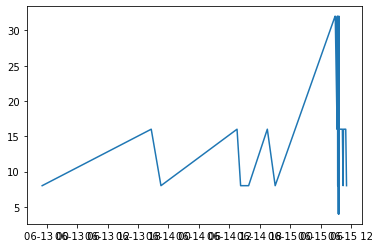

In [78]:
# Plotting time series data with a timestamp
plt.plot(df2.timestamp2, df2.ram)